In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd

In [2]:
df = pd.read_excel('C:/Users/HAMID/Documents/Tugas Kuliah Hamid/Data Mining/UAS Datmin/titanic.xlsx')

# Exploratory data Analysis

In [3]:
import numpy as np
import seaborn as sns
import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [4]:
print(df.shape) 

(1309, 14)


data set titanic terdiri dari 1309 baris dan 14 kolom

In [5]:
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

### Berikut adalah penjelasan dari setiap fitur pada Titanic Dataset 

**pclass** -> Kelas tiket yang dimiliki oleh penumpang kapal (1=kelas satu , 2= kelas dua ,dan 3=kelas tiga) 

**survived** -> Bertahan hidupnya penumpang titanic setelah terjadinya kecelakaan (1=hidup, 0=mati)

**name** -> Nama penumpang

**Sex** -> Kelamin penumpang

**Age** -> Umur Penumpang

**sibsp** -> Jumlah saudara kandung penumpang

**parch** -> Jumlah anak dan orang tua dari penumpang 

**tiket** -> Nomor Tiket penumpang

**fare** -> Harga tiket

**cabin** -> Nomor Cabin

**embarked** -> Area penumpang mulai naik kapal titanic (C = Cherbourg, Q = Queenstown, dan  S = Southampton)




In [6]:
df.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

Dari data diatas didapat bahwa fitur Age ternyata memiliki 263 bagian yang kosong dan fitur Body hanya memiliki 121 bagian sisanya kosong 

sehingga karena banyaknya cell yang kosong pada fitur body maka fitur body di eliminasi , lalu untuk fitur nama juga dieliminasi karena kita tidak bisa membuat analysis pada fitur ini

In [7]:
#df.drop(['body','name'], 1, inplace=True)

In [8]:
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

fitur Age yang kosong dapat diisi median atau mean  ,tetapi karena median bersifat lebih robust terhadap outlier maka dalam data ini digunakan median dalam mengisi data kosongnya #sumberKaggle

In [9]:
df['age'] = df['age'].fillna(df['age'].median())
df.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.503183     0.498854     0.385027   
std       0.837836     0.486055    12.905246     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    22.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    35.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

## Plot
Selanjutnya akan dibuat plot untuk memahami data dengan melihat kebertahanan hidup (Survived) penumpang berdasarkan beberapa fitur 

Pertama akan dilihat bagaimana pengaruh jenis kelamin dengan survival tiap penumpang yang kemudian keduanya dilihat pengaruhnya dengan umur berdasarkan Plot yang dibuat 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


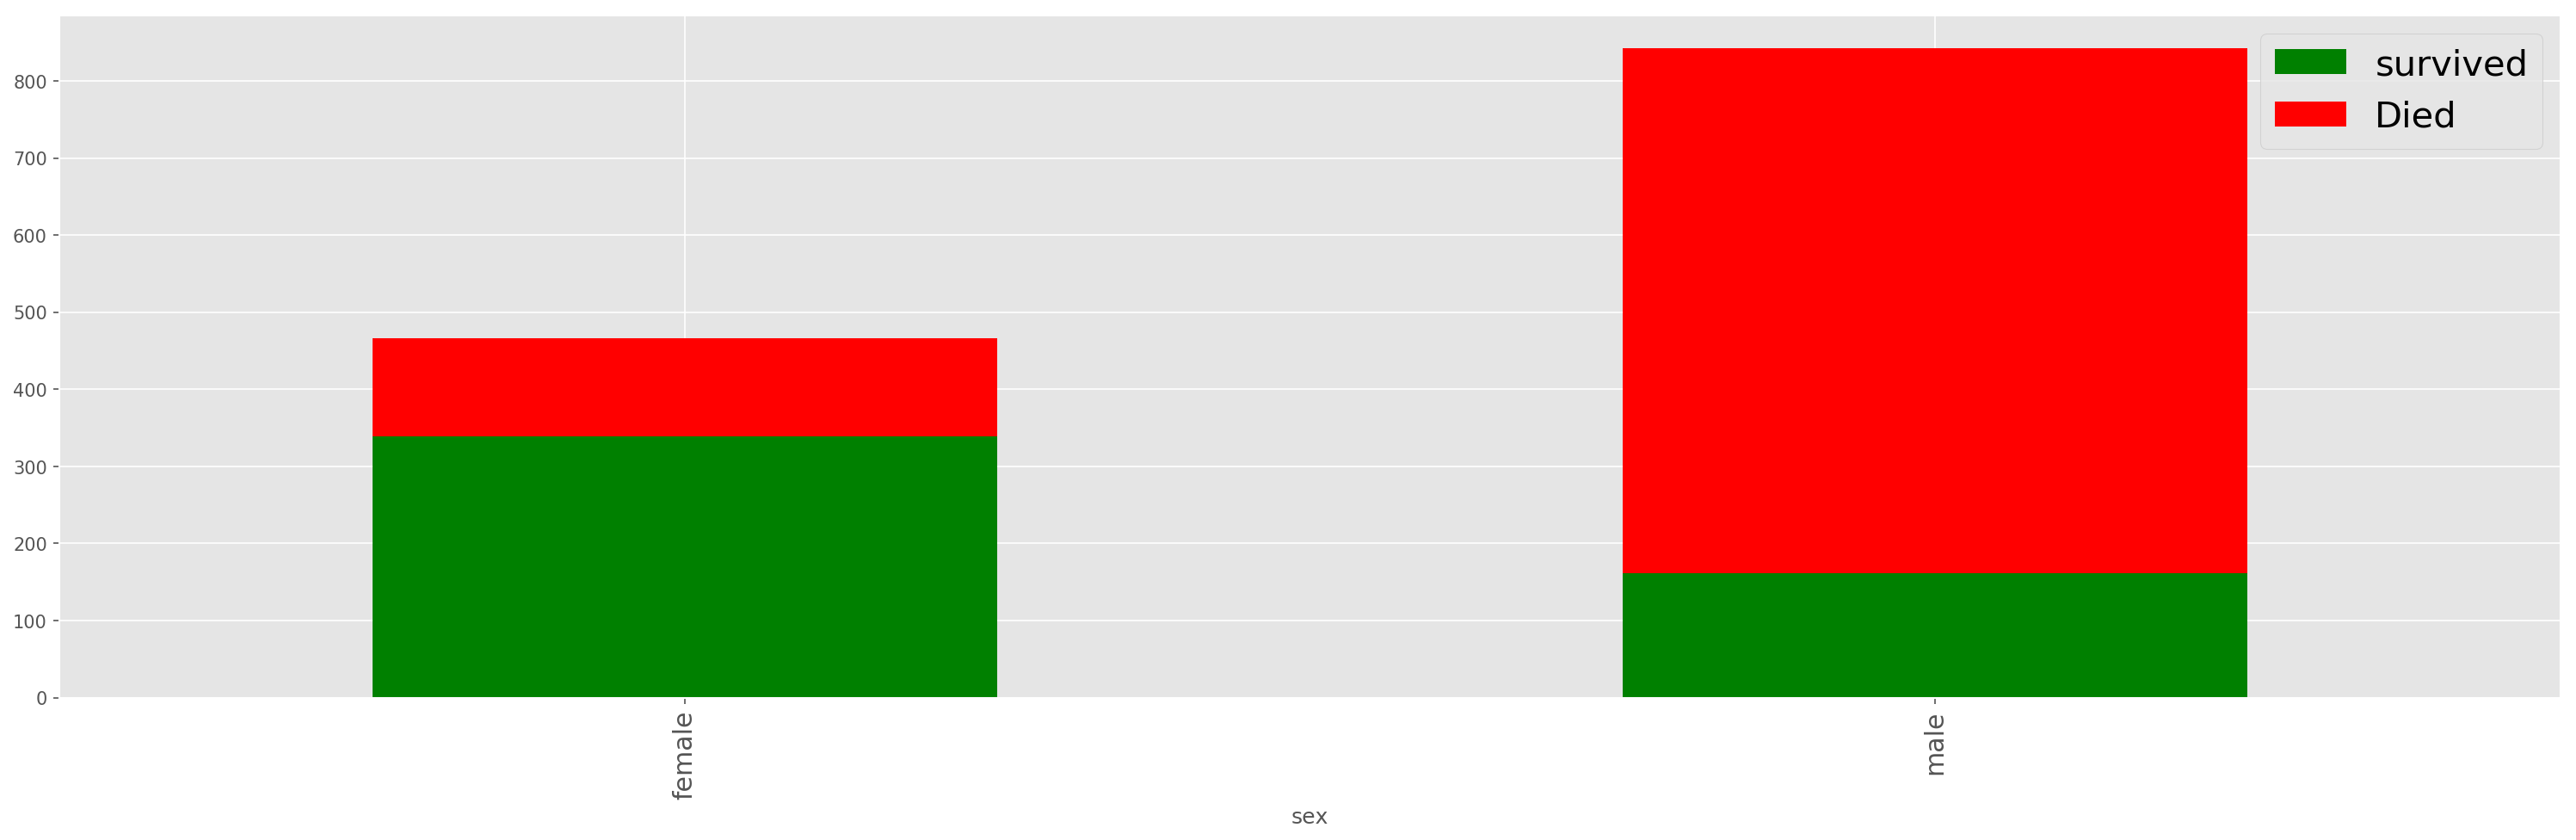

In [10]:
df['Died'] = 1 - df['survived']
df.groupby('sex').agg('sum')[['survived', 'Died']].plot(kind='bar', figsize=(25, 7),stacked=True, colors=['g', 'r']);
plot.show()

### Penjelasan 
Dari chart mengenai kematian berdasarkan jenis kelamin terlihat bahwa penumpang laki-laki lebih banyak menginggal dibanding perempuan sehingga ini mengindikasikan bahwa pada saat kecelakaan teradi ,upaya penyelamatan lebih mengutamakan perempuan dibanding laki-laki

#### Sekarang akan dilihat bagaimana keterkaitan atau hubungan nya dengan umur

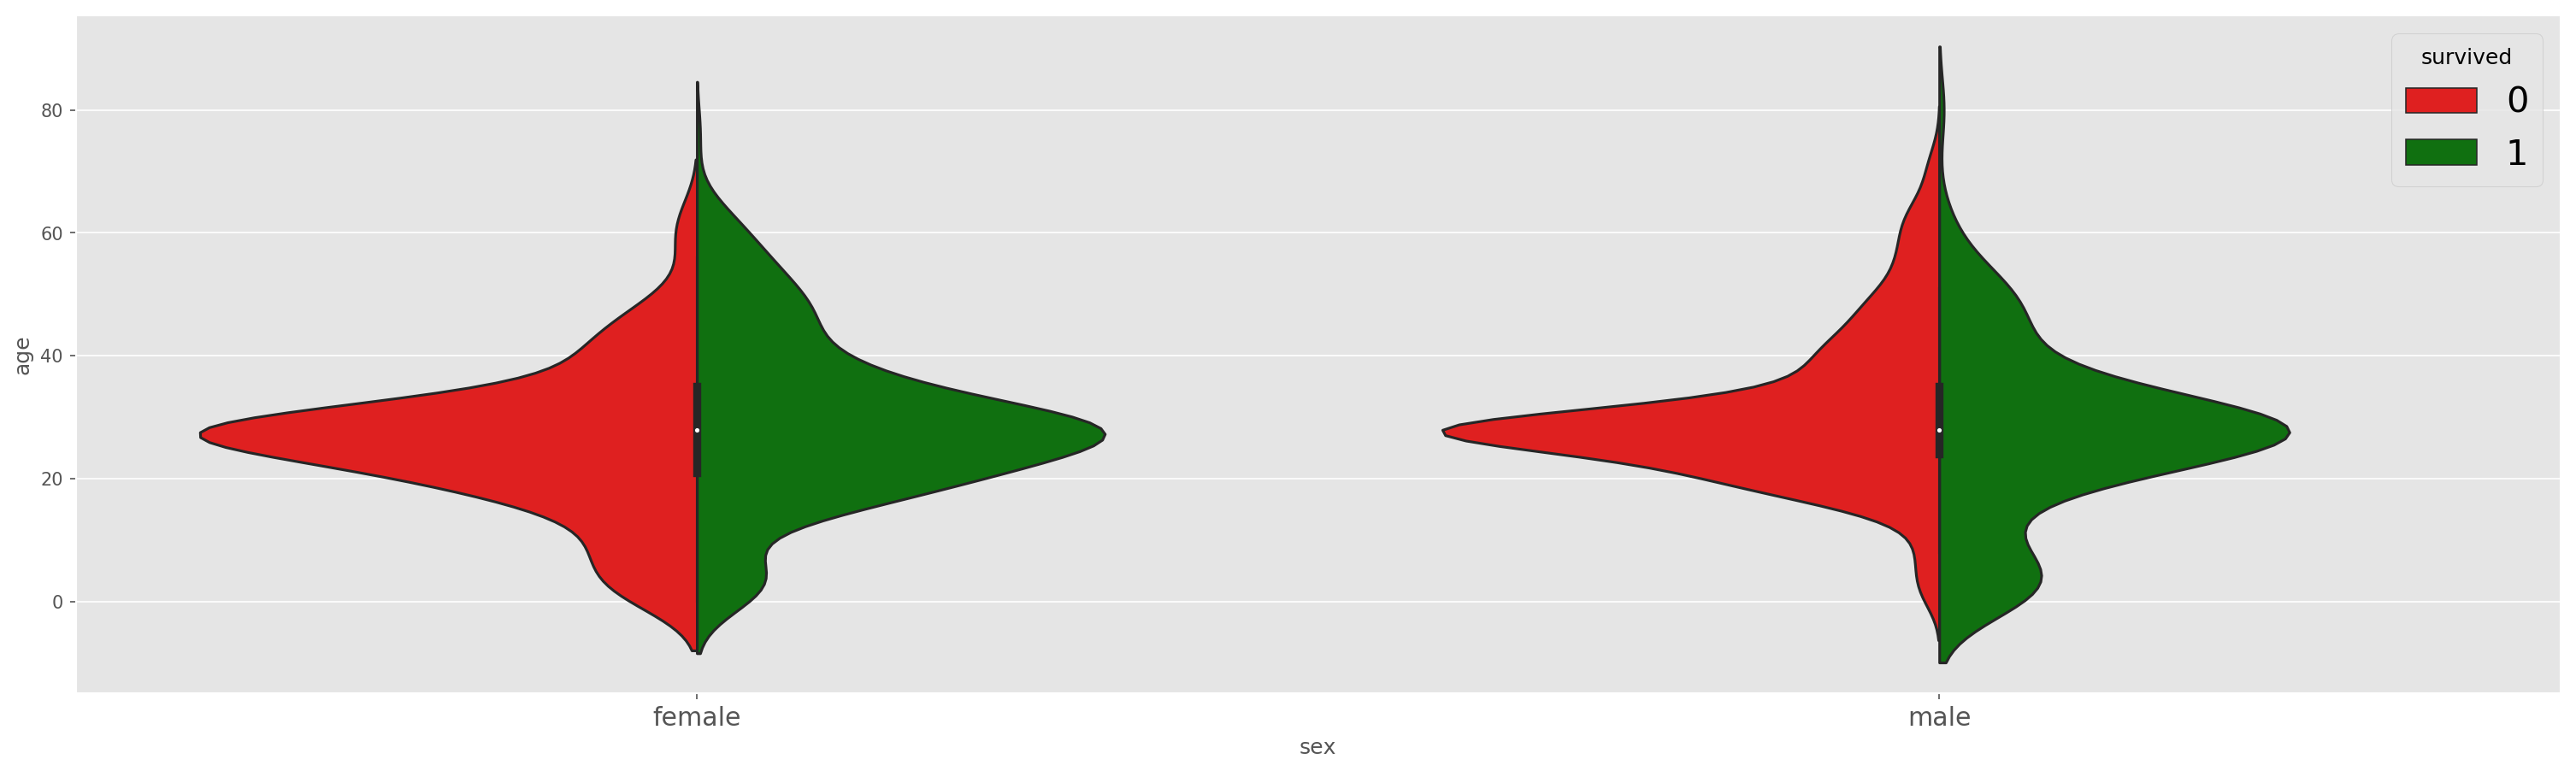

In [11]:
fig = plot.figure(figsize=(25, 7))
sns.violinplot(x='sex', y='age',hue='survived',data=df,split=True,palette={0: "r", 1: "g"});
plot.show()

#### Penjelasan

Dari Plot diatas sekilas terlihat bahwa wanita lebih banyak yang survive dibanding laki laki , walaupun demikian laki laki juga untuk umur kisaran 20-30 an banyak pula yang hidup ,serta umur 0-15 an juga,sehingga ini menggambarkan saat situasi kecelakaan terjadi, penyelamatan berfokus pada wanita dan anak-anak terlebih dahulu.


## Fare Tiket

Selanjutnya akan dilihat bagaimana harga tiket dengan jumlah penumpang terhadap Survive nya penumpang atau tidak

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


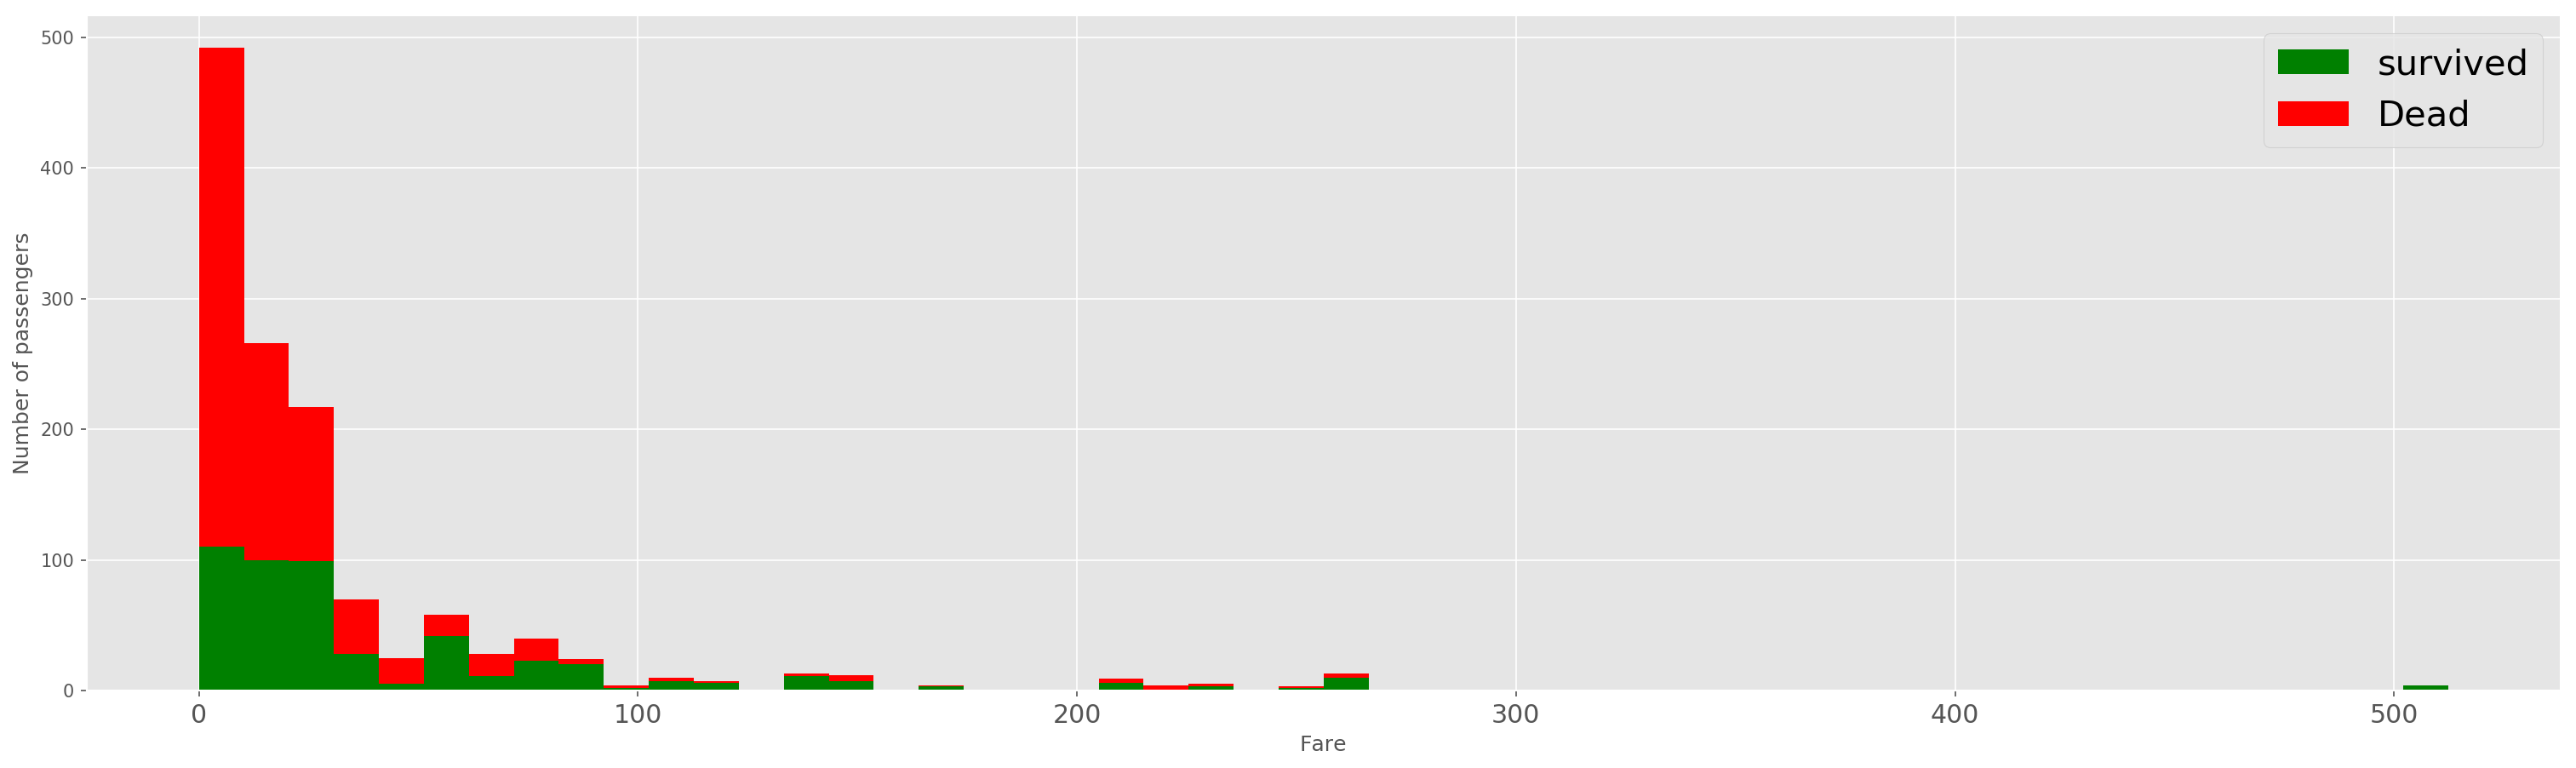

In [12]:
figure = plot.figure(figsize=(25, 7))
plt.hist([df[df['survived'] == 1]['fare'], df[df['survived'] == 0]['fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();
plt.show()

#### Penjelasan

Dari prot diatas terlihat bahwa penumpang yang harga tiketnya lebih murah lebih banyak yang mati dibanding penumpang yang memiliki tiket lebih mahal , sehingga ini mengindikasikan bahwa dalam upaya penyelamatan status sosial diperhitungkan

### Bagaimana jika dihubungkan dengan umurnya dalam satu plot???

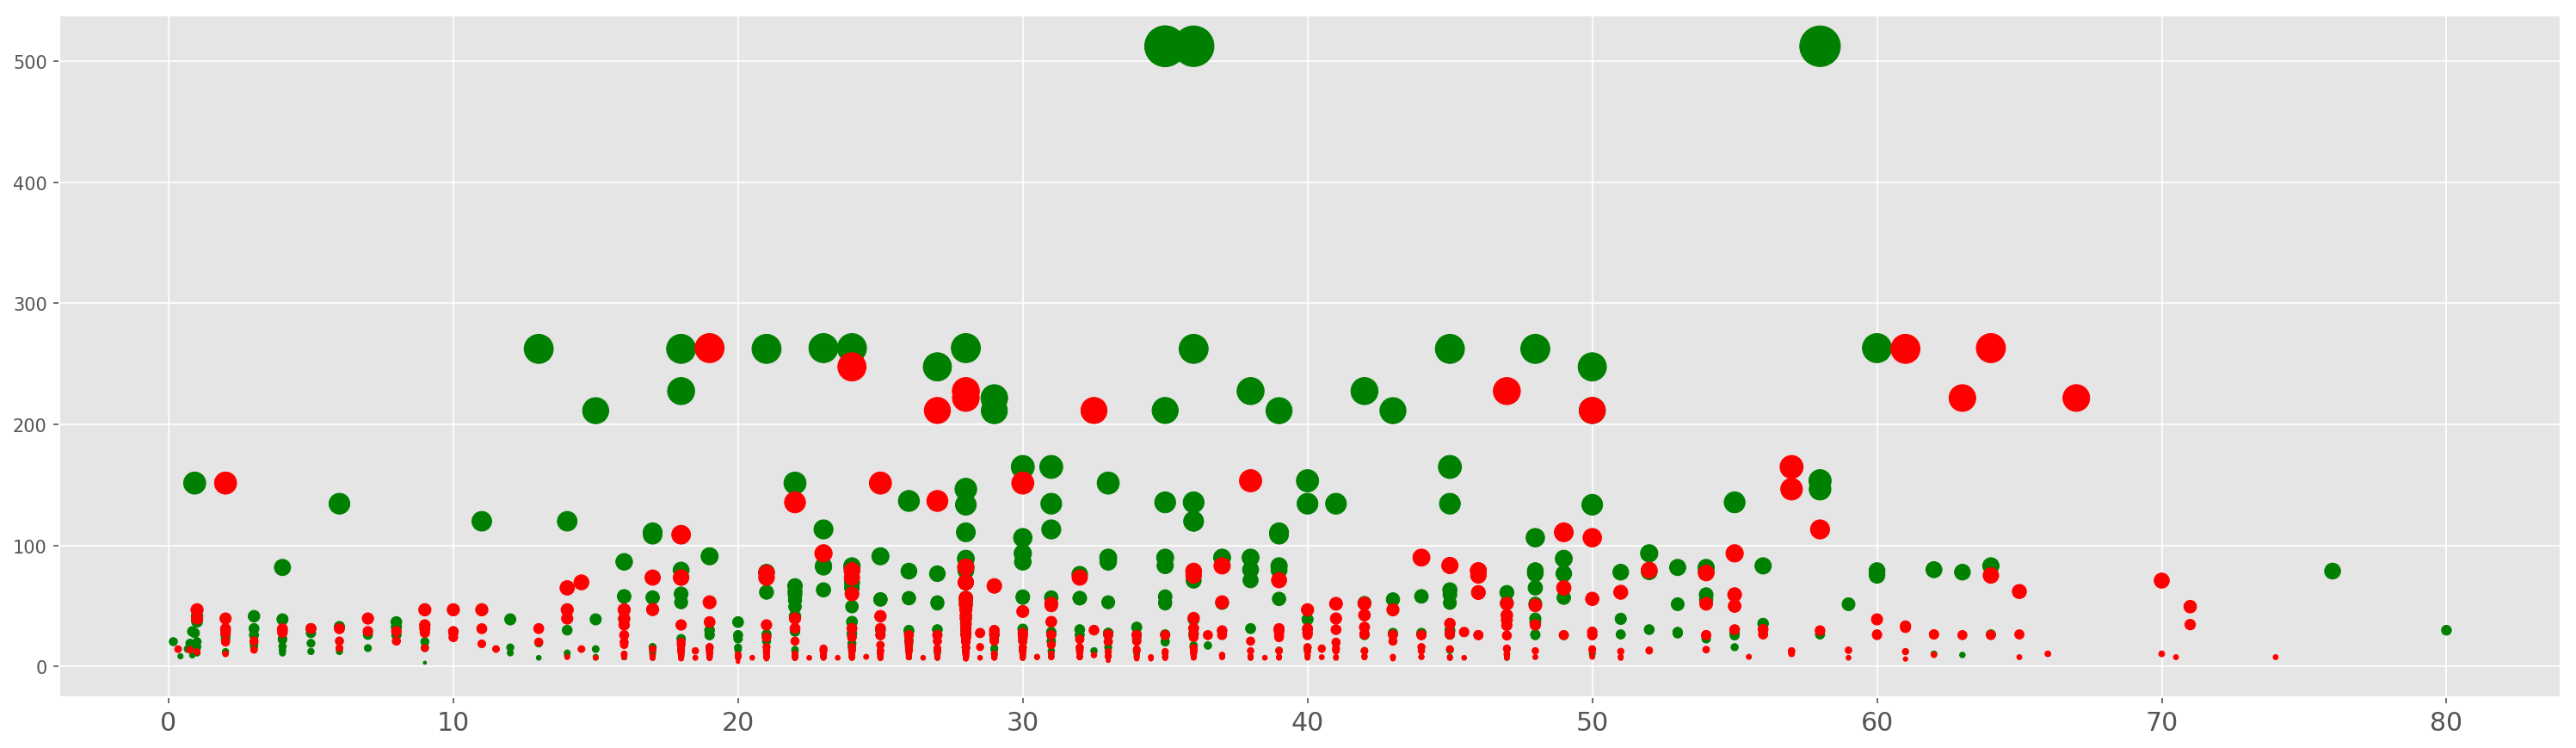

In [13]:
plot.figure(figsize=(25, 7))
ax = plot.subplot()

ax.scatter(df[df['survived'] == 1]['age'], df[df['survived'] == 1]['fare'], 
           c='green', s=df[df['survived'] == 1]['fare'])
ax.scatter(df[df['survived'] == 0]['age'], df[df['survived'] == 0]['fare'], 
           c='red', s=df[df['survived'] == 0]['fare']);
plot.show()

### Penjelasan

Dari plot ini ,dimana sumbu x merupakan umur dan y adalah harga tiket (fare)

Ukuran lingkaran menyatakan proporsi dari harga tiket

kita dapat mengambil informasi bahwa terbaginya beberapa kelompok disini dimana
1. Lingkaran besar hijau -> menyebar antara umur 20-50 merupakan kelompok orang dewasa dengan harga tiket mahal
2. Lingkaran merah kecil -> menyebar antara umur 10-50 merupakan kelompok orang dewasa dengan harga tiket kelas bawah
3. Lingkaran hijau kecil -> menyebar antara umur 0-7 merupakan kelompok anak kecil yang diselamatkan

Dari fakta diatas akan dilihat hubungan antara Fare dan Kelasnya (Pclass) 

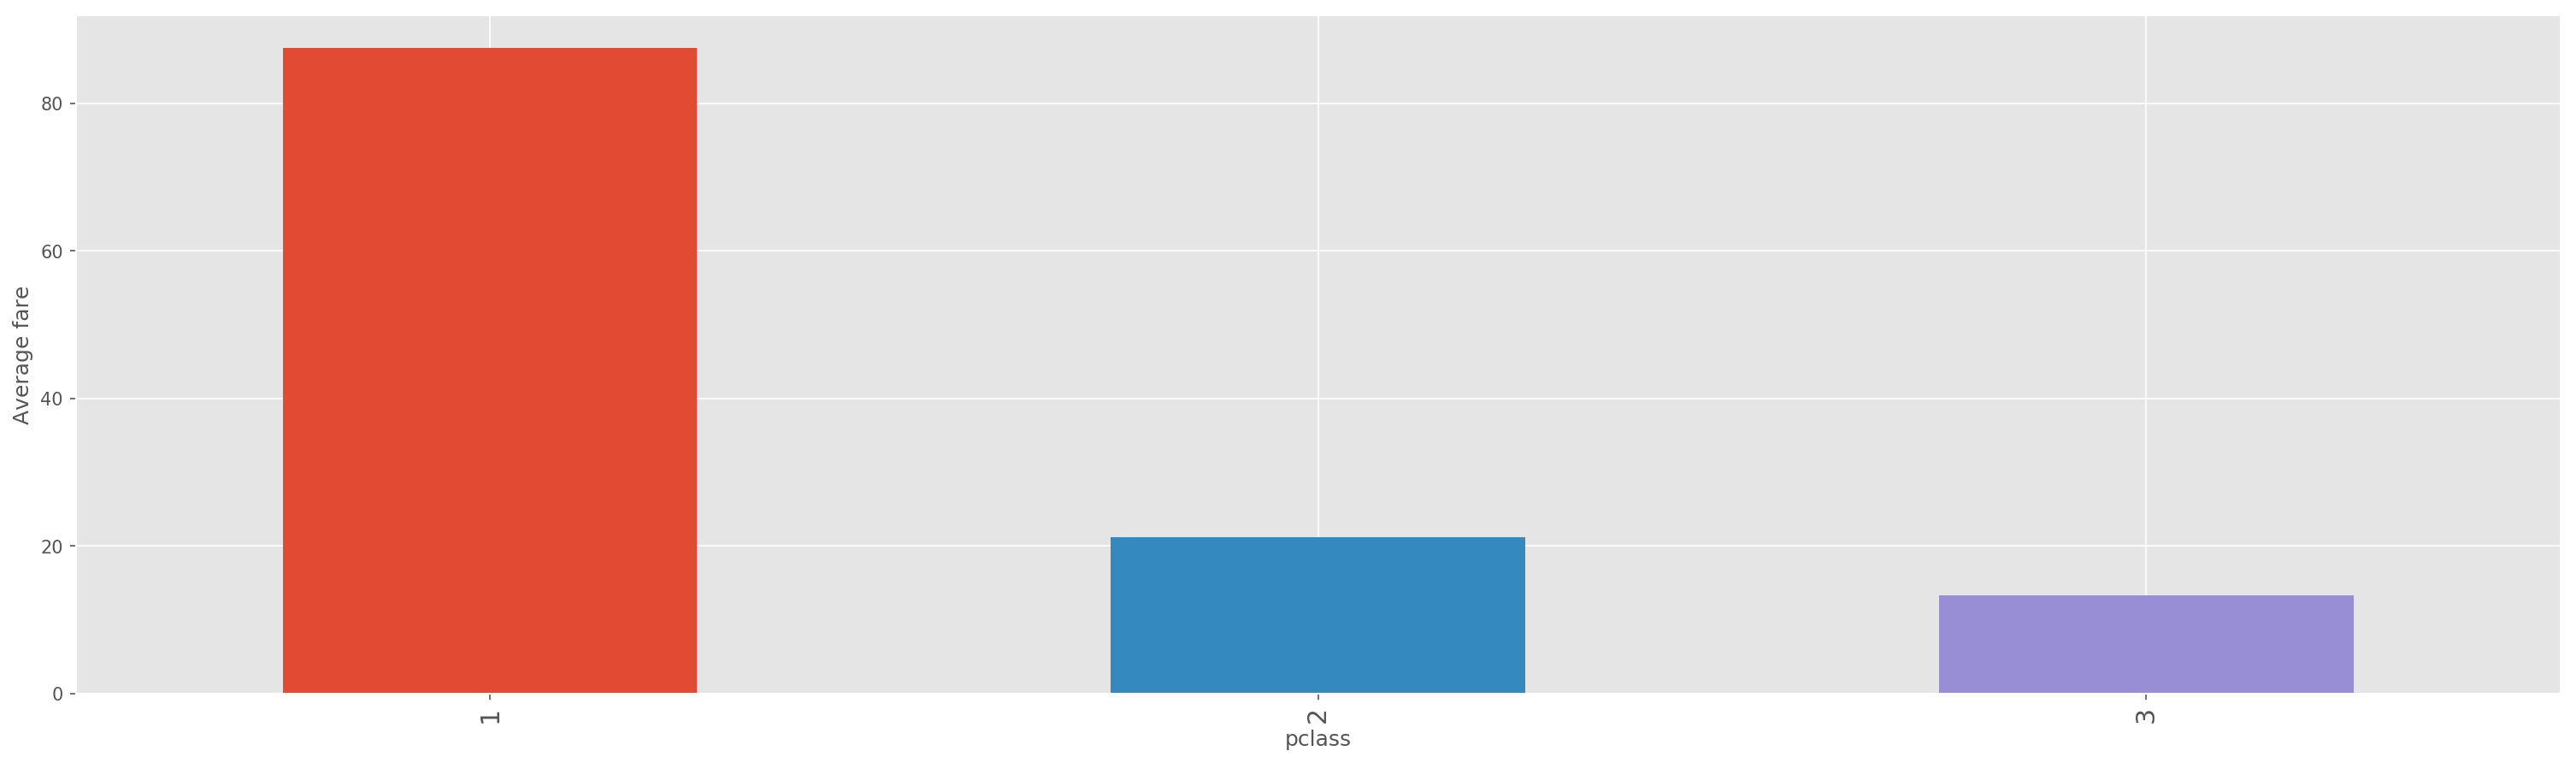

In [14]:
ax = plot.subplot()
ax.set_ylabel('Average fare')
df.groupby('pclass').mean()['fare'].plot(kind='bar', figsize=(25, 7), ax = ax);
plt.show()

**Selanjutnya akan dilihat pengaruh Embarkation terhadap survivalnya**

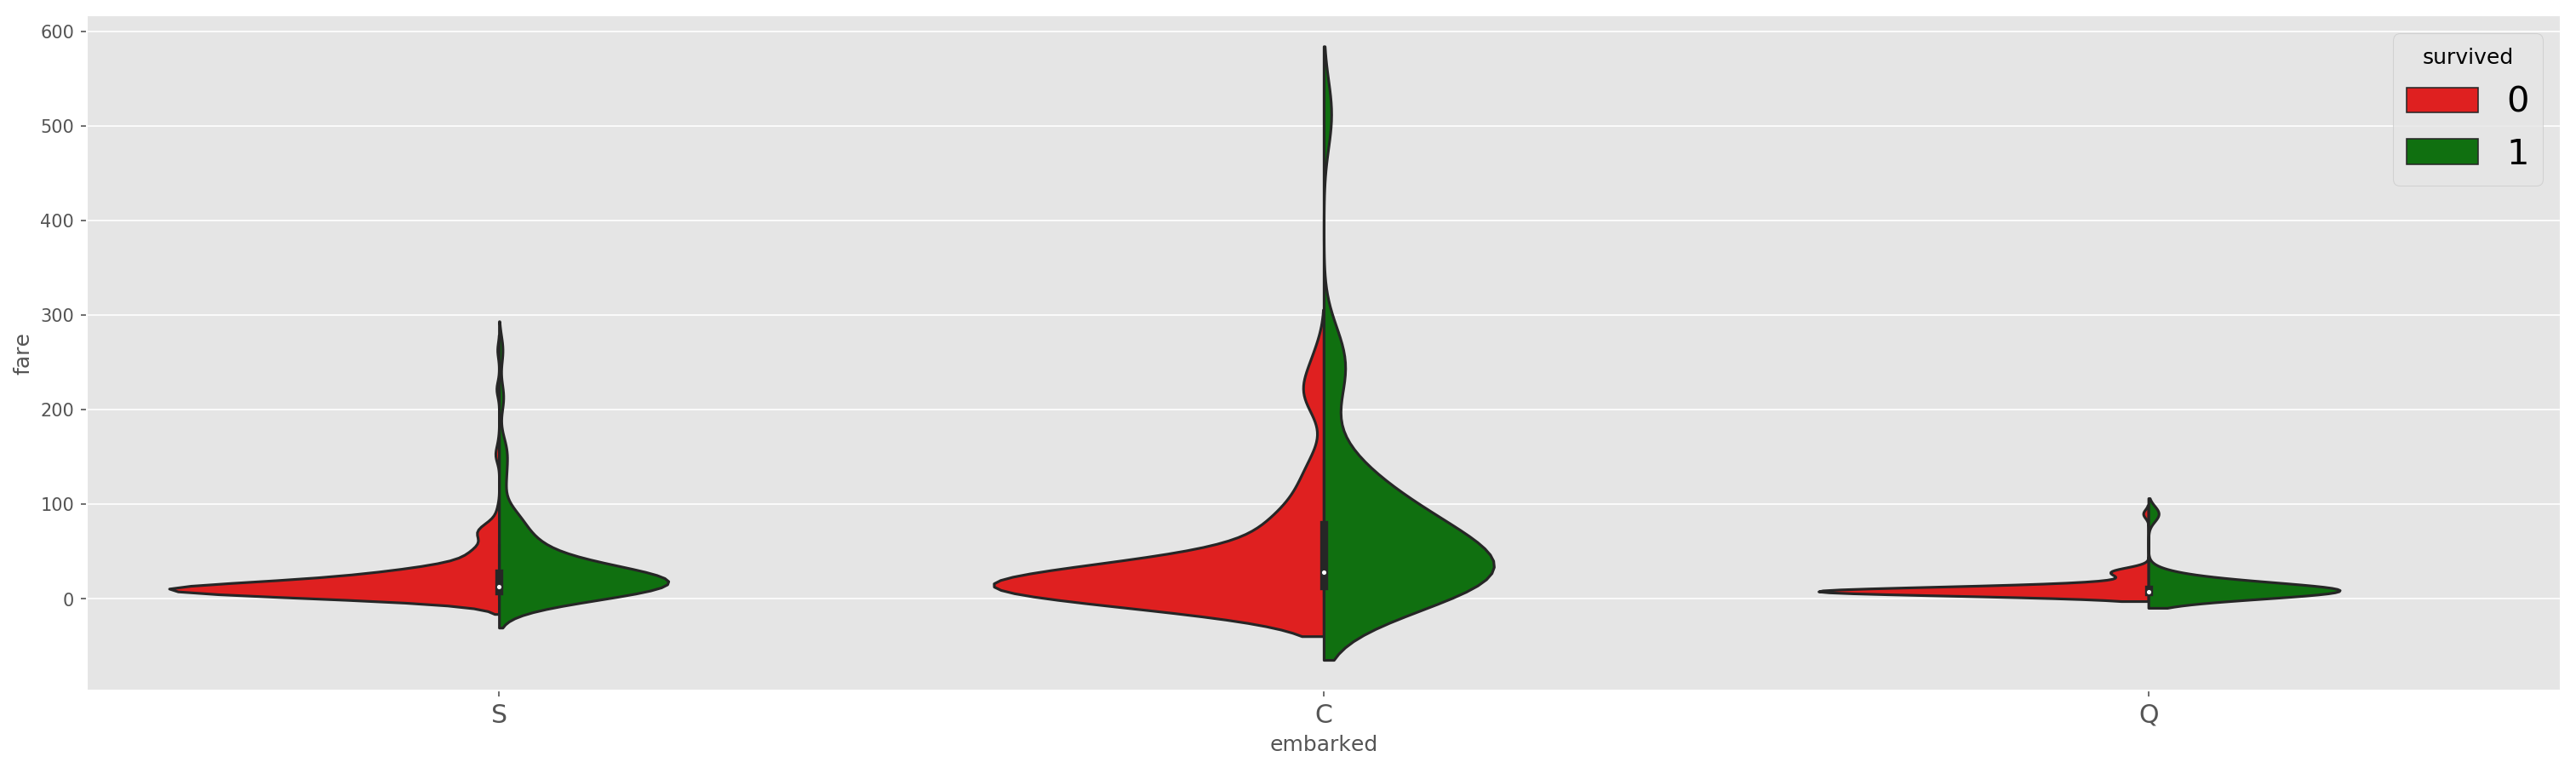

In [15]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='embarked', y='fare', hue='survived', data=df, split=True, palette={0: "r", 1: "g"});
plt.show()


## Penjelasan

1. Dari sini terlihat pada embarked C ,interval fare(Harga tiket) lebih tinggi dari sini orang orang dari embarked C menjadi yang paling banyak membeli tiket mahal dan yang membeli rata rata semua selamat , walaupun untuk pembelian tiket yang lebih murah masih lebih banyak yang tidak berhasil dilamatkan
2. Pada embarked S pembeian tiket mahal masih lebih banyak dibanding embarked Q bahkan pada embarked Q untuk harga tiket diatas 150 tidak ada yang membeli, begitu pula dengan tiket murah 

Dari fakta ini didapat bahwa orang-orang dari embarked C menjadi orang yang paling banyak paling banyak membeli tiket mahal dan mereka semua rata rata hidup  

# Feature Enginering

Setelah melakukan explanatory analysis sebelumnya selanjutnya akan dilakukan prepocessing sebelum melakukan pengklasifikasian K-Means

In [16]:
def status(feature):
    print('Processing', feature, ': ok')

In [18]:
data=pd.read_excel('C:/Users/HAMID/Documents/Tugas Kuliah Hamid/Data Mining/UAS Datmin/titanic.xlsx')
data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [19]:
titles = set()
for name in data['name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Lady', 'the Countess', 'Mr', 'Master', 'Ms', 'Col', 'Jonkheer', 'Major', 'Miss', 'Rev', 'Mlle', 'Don', 'Sir', 'Dona', 'Capt', 'Dr', 'Mme', 'Mrs'}


### Extracting the passenger titles

Pada data penumpang mengandung informasi berharga.

contohnya :

    Braund, Mr Owen Harris
    Heikkinen, Miss. Laina
    Oliva y Ocana, Dona. Fermina
    Peter, Master. Michael J
    
pada contoh diatas bisa diliat setiap nama memiliki judul didalamnya seperti Mr,Miss  dan sebagainya, ini bisa menjadi informasi berharga mengenai status sosial orang tersebut dari data itu, sehingga tahap selanjutnya akan dilakukan pengekstrakan judulnya dan mengkonversi ke variabel biner

Pertama akan dilihat judul apa saja yang berbeda di data ini

In [20]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    data['Title'] = data['name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    data['Title'] = data.Title.map(Title_Dictionary)
    status('Title')
    return data

In [21]:
data=get_titles()

Processing Title : ok


Fungsi ini mem-parsing nama dan mengekstrak judul. Kemudian, memetakan judul untuk masing-masing kategori judul. kami pilih :

    Officer
    Royalty
    Mr
    Mrs
    Miss
    Master

In [22]:
data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest   Title  
0                     St Louis, MO    Miss  
1  Montreal, PQ / Chesterville, ON  Master  
2  Montreal, PQ / Chesterville, ON    Miss  
3  Montreal, PQ / Chesterville, ON      Mr  
4  Montreal, PQ / Chesterville, ON     Mrs

Sekarang akan diperiksa apakah judul setiap data sudah diisi dengan benar

In [23]:
data[data['Title'].isnull()]

pclass  survived                          name     sex   age  sibsp  \
218       1         1  Oliva y Ocana, Dona. Fermina  female  39.0      0   

     parch    ticket   fare cabin embarked boat  body home.dest Title  
218      0  PC 17758  108.9  C105        C    8   NaN       NaN   NaN

Memang ada nilai NaN di baris 1305. Bahkan nama yang sesuai adalah Oliva y Ocana, Dona. Fermina.

Judul ini tidak disebarkan dalam dataset.

Sekarang kami memiliki kolom tambahan bernama Title yang berisi informasi.

### Prepocessing Age

Kita telah melihat pada bagian pertama bahwa variabel Umur kehilangan 177 nilai. Ini adalah angka yang besar (~ 13% dari kumpulan data). Cukup menggantinya dengan mean atau median umur mungkin bukan solusi terbaik karena usia mungkin berbeda berdasarkan kelompok dan kategori penumpang.

Untuk memahami mengapa, kami kumpulan data berdasarkan jenis kelamin, Judul, dan kelas penumpang dan untuk setiap bagian dengan menghitung median pada usia.

Untuk menghindari kebocoran data dari dataset, kami mengisi kolom usia yang hilang pada data menggunakan hasil dari perhitungan pada dataset yang ada.

#### Jumlah usia yang hilang pada dataset

In [24]:
print(data.age.isnull().sum())

263


In [25]:
grouped_data = data.groupby(['sex','pclass','Title'])
grouped_median_data = grouped_data.median()
grouped_median_data = grouped_median_data.reset_index()[['sex', 'pclass', 'Title', 'age']]

In [26]:
grouped_median_data.head()

sex  pclass    Title   age
0  female       1     Miss  30.0
1  female       1      Mrs  45.0
2  female       1  Officer  49.0
3  female       1  Royalty  40.5
4  female       2     Miss  20.0

dataframe ini akan membantu kami menghitung nilai usia yang hilang berdasarkan kriteria yang berbeda.

Lihatlah kolom usia median dan lihat bagaimana nilai ini bisa berbeda berdasarkan Sex, Pclass, dan Title digabungkan.

Sebagai contoh:

    Jika penumpang perempuan, dari Pclass 1, dan dari bangsawan, usia rata-rata adalah 40.5.
    Jika penumpang laki-laki, dari Pclass 3, dengan gelar Mr, usia rata-rata adalah 26.

Akan dibuat fungsi untuk mengisi usia yang hilang secara langsung berdsarkan atribut yang berbeda ini.

In [27]:
def fill_age(row):
    condition = (
        (grouped_median_data['sex'] == row['sex']) & 
        (grouped_median_data['Title'] == row['Title']) & 
        (grouped_median_data['pclass'] == row['pclass'])
    ) 
    return grouped_median_data[condition]['age'].values[0]


def process_age():
    global data
    # a function that fills the missing values of the Age variable
    data['age'] = data.apply(lambda row: fill_age(row) if np.isnan(row['age']) else row['age'], axis=1)
    status('age')
    return data

In [28]:
data = process_age()

Processing age : ok


Sekarang umur yang hilang telah diisi.

Namun pada nilai kolom Fare ada nilai yang hilang, pada kolom embarked 2 yang hilang dan pada Cabin banyak nilai yang hilang , hal ini akan di selesaikan di selanjutnya.

#### Sekarang akan diproses kolom nama . 

### Processing Name

In [29]:
def process_names():
    global data
    # we clean the Name variable
    data.drop('name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(data['Title'], prefix='Title')
    data = pd.concat([data, titles_dummies], axis=1)
    
    # removing the title variable
    data.drop('Title', axis=1, inplace=True)
    
    status('names')
    return data

Fungsi ini membuang kolom Nama karena tidak akan digunakan lagi karena kami membuat kolom Judul.

kemudian kami meng -encode kolom judul menjadi variabel dummy sebagai berikut :

In [30]:
data = process_names()

Processing names : ok


In [31]:
data.head()

pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0       1         1  female  29.0000      0      0   24160  211.3375       B5   
1       1         1    male   0.9167      1      2  113781  151.5500  C22 C26   
2       1         0  female   2.0000      1      2  113781  151.5500  C22 C26   
3       1         0    male  30.0000      1      2  113781  151.5500  C22 C26   
4       1         0  female  25.0000      1      2  113781  151.5500  C22 C26   

  embarked boat   body                        home.dest  Title_Master  \
0        S    2    NaN                     St Louis, MO             0   
1        S   11    NaN  Montreal, PQ / Chesterville, ON             1   
2        S  NaN    NaN  Montreal, PQ / Chesterville, ON             0   
3        S  NaN  135.0  Montreal, PQ / Chesterville, ON             0   
4        S  NaN    NaN  Montreal, PQ / Chesterville, ON             0   

   Title_Miss  Title_Mr  Title_Mrs  Title_Officer  Title_Royalty  
0           1         0          0              0              0  
1           0         0          0              0              0  
2           1         0          0              0              0  
3           0         1          0              0              0  
4           0         0          1              0              0

Seperti yang di lihat :

tidak ada lagi kolom nama.
variabel baru (Title_X) muncul. Fitur-fitur ini bersifat biner.
    Misalnya, Jika Title_Mr = 1, Judul yang sesuai adalah Mr


## Processing Fare

Sekrang akan dimasukan nilai yang hilang pada kolom fare


In [32]:
def process_fares():
    global data
    # there's one missing fare value - replacing it with the mean.
    data.fare.fillna(data.fare.mean(), inplace=True)
    status('fare')
    return data

In [33]:
combined = process_fares()

Processing fare : ok


## Processing Embarked

In [34]:
def process_embarked():
    global data
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    data.embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(data['embarked'], prefix='embarked')
    data = pd.concat([combined, embarked_dummies], axis=1)
    data.drop('embarked', axis=1, inplace=True)
    status('embarked')
    return combined

Fungsi ini menggantikan dua nilai yang hilang dari Embarked dengan nilai Embarked yang paling sering karena tipe data embarked sendiri yang katagorik dan data yang hilang sedikit sehingga lebih mudah mengisinya dengan nilai yang sering keluar

In [35]:
combined = process_embarked()

Processing embarked : ok


In [36]:
data.head()

pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0       1         1  female  29.0000      0      0   24160  211.3375       B5   
1       1         1    male   0.9167      1      2  113781  151.5500  C22 C26   
2       1         0  female   2.0000      1      2  113781  151.5500  C22 C26   
3       1         0    male  30.0000      1      2  113781  151.5500  C22 C26   
4       1         0  female  25.0000      1      2  113781  151.5500  C22 C26   

  boat     ...                            home.dest Title_Master  Title_Miss  \
0    2     ...                         St Louis, MO            0           1   
1   11     ...      Montreal, PQ / Chesterville, ON            1           0   
2  NaN     ...      Montreal, PQ / Chesterville, ON            0           1   
3  NaN     ...      Montreal, PQ / Chesterville, ON            0           0   
4  NaN     ...      Montreal, PQ / Chesterville, ON            0           0   

   Title_Mr  Title_Mrs  Title_Officer  Title_Royalty  embarked_C  embarked_Q  \
0         0          0              0              0           0           0   
1         0          0              0              0           0           0   
2         0          0              0              0           0           0   
3         1          0              0              0           0           0   
4         0          1              0              0           0           0   

   embarked_S  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 21 columns]

## Processing Cabin

In [37]:
data_cabin=set()

for c in data['cabin']:
    try:
        data_cabin.add(c[0])
    except:
        data_cabin.add('U')

In [38]:
print(data_cabin)

{'C', 'T', 'G', 'E', 'U', 'F', 'B', 'D', 'A'}


Fungsi diatas adalah fungsi untuk mengambil Huruf yang mewakili di tiap cabin dengan mengambil huruf awalnya

In [39]:
def process_cabin():
    global data    
    # replacing missing cabins with U (for Uknown)
    data.cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    data['cabin'] = data['cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(data['cabin'], prefix='cabin')    
    data = pd.concat([data, cabin_dummies], axis=1)

    data.drop('cabin', axis=1, inplace=True)
    status('cabin')
    return data

Fungsi ini mengganti NaN Values dengan U (Untuk Tidak diketahui 'Unknown'), dan kemudian mengklompokan tiap data kabin berdsarkan huruf awalnya ,dan menencodenya menjadi variabel dummy.

In [40]:
data = process_cabin()

Processing cabin : ok


In [41]:
data.head()

pclass  survived     sex      age  sibsp  parch  ticket      fare boat  \
0       1         1  female  29.0000      0      0   24160  211.3375    2   
1       1         1    male   0.9167      1      2  113781  151.5500   11   
2       1         0  female   2.0000      1      2  113781  151.5500  NaN   
3       1         0    male  30.0000      1      2  113781  151.5500  NaN   
4       1         0  female  25.0000      1      2  113781  151.5500  NaN   

    body   ...    embarked_S  cabin_A  cabin_B  cabin_C  cabin_D  cabin_E  \
0    NaN   ...             1        0        1        0        0        0   
1    NaN   ...             1        0        0        1        0        0   
2    NaN   ...             1        0        0        1        0        0   
3  135.0   ...             1        0        0        1        0        0   
4    NaN   ...             1        0        0        1        0        0   

   cabin_F  cabin_G  cabin_T  cabin_U  
0        0        0        0        0  
1        0        0        0        0  
2        0        0        0        0  
3        0        0        0        0  
4        0        0        0        0  

[5 rows x 29 columns]

## Processing Sex

In [42]:
def process_sex():
    global data
    # mapping string values to numerical one 
    data['sex'] = data['sex'].map({'male':1, 'female':0})
    status('sex')
    return data

Fungsi ini merubah nilai string yang ada pada kolom 'sex' dengan male=1 dan female 0

In [43]:
data = process_sex()

Processing sex : ok


## Processing Pclass

In [44]:
def process_pclass():
    
    global data
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(data['pclass'], prefix="pclass")
    
    # adding dummy variable
    data = pd.concat([data, pclass_dummies],axis=1)
    
    # removing "Pclass"
    data.drop('pclass',axis=1,inplace=True)
    
    status('pclass')
    return data

Fungsi ini mengencode nilai Pclass(1,2,3) menjadi variabel dummy.

In [45]:
data = process_pclass()

Processing pclass : ok


## Processing Ticket

Pertama akan di lihat bagaimana prefiks tiket yang berbeda yang kita miliki dalam dataset kita

In [46]:
#merubah kolom ticket menjadi str agar bisa di gunakan fungsi replace
dataset=pd.read_excel('C:/Users/ACER/Documents/titanic.xlsx')
dataset=dataset['ticket'].astype(str)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/ACER/Documents/titanic.xlsx'

In [ ]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [ ]:
tickets = set()
for t in dataset :
    tickets.add(cleanTicket(t))

In [ ]:
print(len(tickets))

In [ ]:
data.drop('ticket',axis=1,inplace=True)

In [ ]:
data.info()

In [47]:
data= pd.concat([data, dataset],axis=1)

NameError: name 'dataset' is not defined

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 31 columns):
survived         1309 non-null int64
sex              1309 non-null int64
age              1309 non-null float64
sibsp            1309 non-null int64
parch            1309 non-null int64
ticket           1309 non-null object
fare             1309 non-null float64
boat             486 non-null object
body             121 non-null float64
home.dest        745 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
embarked_C       1309 non-null uint8
embarked_Q       1309 non-null uint8
embarked_S       1309 non-null uint8
cabin_A          1309 non-null uint8
cabin_B          1309 non-null uint8
cabin_C          1309 non-null uint8
cabin_D          1309 non-null uint8
cabin_E          1309 non-null uint8

In [49]:
def process_ticket():
    
    global data
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    data['ticket'] = data['ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(data['ticket'].astype(str), prefix='ticket')
    data = pd.concat([data, tickets_dummies], axis=1)
    data.drop('ticket', inplace=True, axis=1)

    status('ticket')
    return data

Fungsi diatas digunakan untuk merubah kolom tiket menjadi variabel dummy berdasarkan prefixnya (37)

In [50]:
data = process_ticket()

AttributeError: 'int' object has no attribute 'replace'

In [ ]:

data.info()


## Processing Family

Bagian ini termasuk membuat variabel baru berdasarkan ukuran keluarga (ukurannya dengan cara, variabel lain yang kita buat).

Pembuatan variabel-variabel baru ini dilakukan di bawah asumsi yang realistis: Keluarga besar dikelompokkan bersama-sama, maka mereka lebih mungkin untuk diselamatkan daripada orang yang bepergian sendiri.

lebih jelasnya bisa dilihat proses dibawah ini

In [ ]:
def process_family():
    
    global data
    # introducing a new feature : the size of families (including the passenger)
    data['FamilySize'] = data['parch'] + data['sibsp'] + 1
    
    # introducing other features based on the family size
    data['Singleton'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return data



Fungsi ini memperkenalkan 4 fitur baru:

    FamilySize: jumlah total kerabat termasuk penumpang (diri sendiri).
    Sigleton: variabel boolean yang menggambarkan keluarga dengan size = 1
    SmallFamily: variabel boolean yang menggambarkan keluarga dari 2 <= size <= 4
    LargeFamily: variabel boolean yang menggambarkan keluarga dari 5 < size


In [51]:
data = process_family()

NameError: name 'process_family' is not defined

In [52]:
data.head()

survived  sex      age  sibsp  parch  ticket      fare boat   body  \
0         1    0  29.0000      0      0   24160  211.3375    2    NaN   
1         1    1   0.9167      1      2  113781  151.5500   11    NaN   
2         0    0   2.0000      1      2  113781  151.5500  NaN    NaN   
3         0    1  30.0000      1      2  113781  151.5500  NaN  135.0   
4         0    0  25.0000      1      2  113781  151.5500  NaN    NaN   

                         home.dest    ...     cabin_C  cabin_D  cabin_E  \
0                     St Louis, MO    ...           0        0        0   
1  Montreal, PQ / Chesterville, ON    ...           1        0        0   
2  Montreal, PQ / Chesterville, ON    ...           1        0        0   
3  Montreal, PQ / Chesterville, ON    ...           1        0        0   
4  Montreal, PQ / Chesterville, ON    ...           1        0        0   

   cabin_F  cabin_G  cabin_T  cabin_U  pclass_1  pclass_2  pclass_3  
0        0        0        0        0         1         0         0  
1        0        0        0        0         1         0         0  
2        0        0        0        0         1         0         0  
3        0        0        0        0         1         0         0  
4        0        0        0        0         1         0         0  

[5 rows x 31 columns]

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 31 columns):
survived         1309 non-null int64
sex              1309 non-null int64
age              1309 non-null float64
sibsp            1309 non-null int64
parch            1309 non-null int64
ticket           1309 non-null object
fare             1309 non-null float64
boat             486 non-null object
body             121 non-null float64
home.dest        745 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
embarked_C       1309 non-null uint8
embarked_Q       1309 non-null uint8
embarked_S       1309 non-null uint8
cabin_A          1309 non-null uint8
cabin_B          1309 non-null uint8
cabin_C          1309 non-null uint8
cabin_D          1309 non-null uint8
cabin_E          1309 non-null uint8

In [54]:
print(data.shape)

(1309, 31)


Sehingga didapat 71 fitur dan 1309 baris dari proses diatas.

# K-Means Analysis

Selanjutnya data akan dikelompokan dengan metode K-Means dengan pertama-tama akan didefinisikan variabel dari data target dan data yang akan diolah

**Karena fitur :**      

boat 486 non-null object

body 121 non-null float64

home.dest 745 non-null object

memiliki banyak data NaN atau nilai yang hilang maka variabel diatas tidak dimasukan dalam K-Means Analysis

In [55]:
DataKmeans1=data.iloc[:,[0,1,2,3,4,5,9]] 
DataKmeans2=data.iloc[:,10:71]

In [56]:
DataKmeans=pd.concat([DataKmeans1, DataKmeans2],axis=1) #data yang akan dikelompokan
DataKmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
survived         1309 non-null int64
sex              1309 non-null int64
age              1309 non-null float64
sibsp            1309 non-null int64
parch            1309 non-null int64
ticket           1309 non-null object
home.dest        745 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
embarked_C       1309 non-null uint8
embarked_Q       1309 non-null uint8
embarked_S       1309 non-null uint8
cabin_A          1309 non-null uint8
cabin_B          1309 non-null uint8
cabin_C          1309 non-null uint8
cabin_D          1309 non-null uint8
cabin_E          1309 non-null uint8
cabin_F          1309 non-null uint8
cabin_G          1309 non-null uint8
cabin_T          1309 non-null uint8
ca

#### Menyamakan tipe data untuk mempermudah analysis

In [57]:
def handle_non_numerical_data(DataKmeans):
    columns = DataKmeans.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if DataKmeans[column].dtype != np.int64 and DataKmeans[column].dtype != np.float64:
            column_contents = DataKmeans[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            DataKmeans[column] = list(map(convert_to_int, DataKmeans[column]))

    return DataKmeans

DataKmeans = handle_non_numerical_data(DataKmeans)

In [58]:
DataKmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
survived         1309 non-null int64
sex              1309 non-null int64
age              1309 non-null float64
sibsp            1309 non-null int64
parch            1309 non-null int64
ticket           1309 non-null int64
home.dest        1309 non-null int64
Title_Master     1309 non-null int64
Title_Miss       1309 non-null int64
Title_Mr         1309 non-null int64
Title_Mrs        1309 non-null int64
Title_Officer    1309 non-null int64
Title_Royalty    1309 non-null int64
embarked_C       1309 non-null int64
embarked_Q       1309 non-null int64
embarked_S       1309 non-null int64
cabin_A          1309 non-null int64
cabin_B          1309 non-null int64
cabin_C          1309 non-null int64
cabin_D          1309 non-null int64
cabin_E          1309 non-null int64
cabin_F          1309 non-null int64
cabin_G          1309 non-null int64
cabin_T          1309 non-null int64
cab

#### Memisahkan data target dengan data awal

In [59]:
p = DataKmeans.drop(['survived'], 1).astype(float) #data tanpa variabel target
q = DataKmeans['survived'] #variabel target

#### Metode Eilbow untuk menentukan K-Terbaik

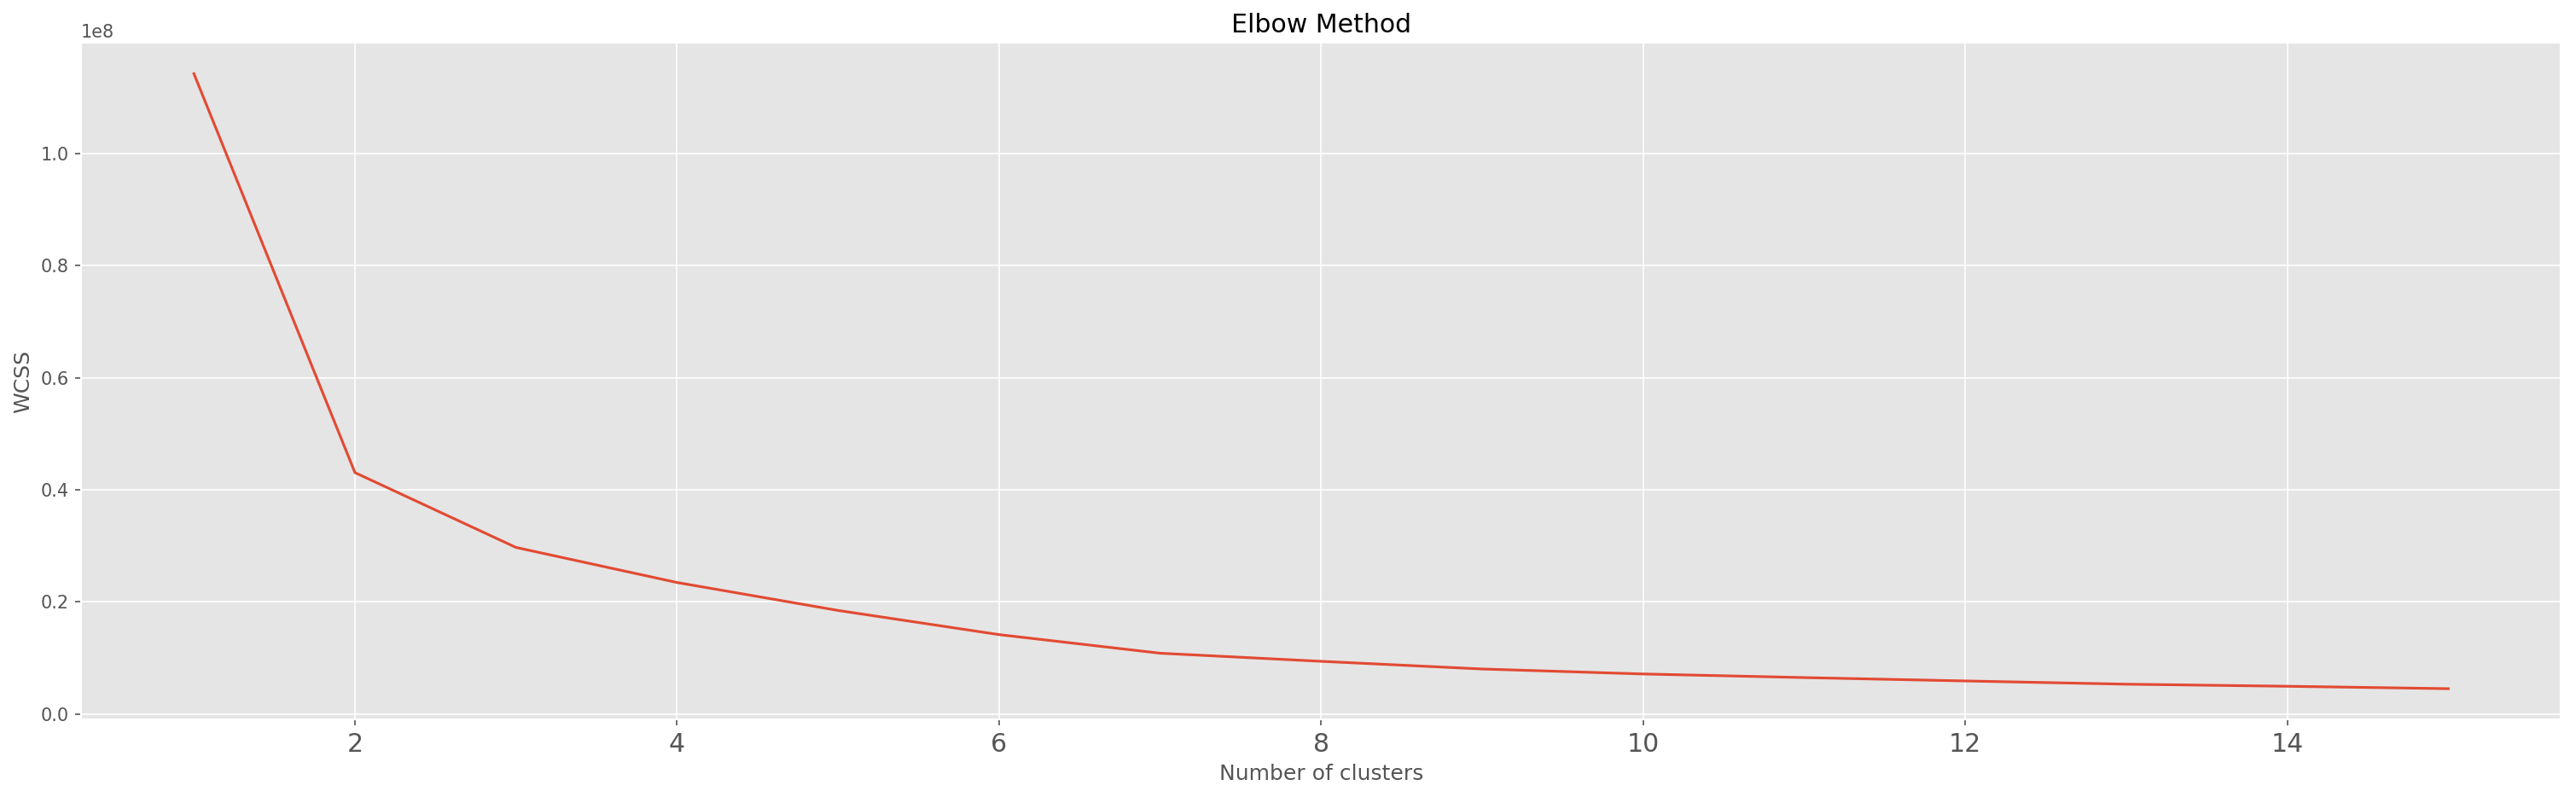

In [60]:
wcss = []
for i in range(1,16):#banyak cluster yang inngin di coba dalam kasus ini dari 1-16
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 0)
    kmeans.fit(p)
    wcss.append(kmeans.inertia_) #Inertia is Sum of squared distances of samples to their closest cluster center.

#Plot Eilbow    
plot.plot(range(1,16),wcss)
plot.title('Elbow Method')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.show()

Dari sini didapat n ter baiknya adalah benar 2 sehingga untuk menunjukan bahwa data memang menunjukan kesuatu Entitas 2 hal , dalam kasus ini 2 hal itu adalah hidup matinya seseorang pada kasus kecelakaan titanic

#### Pembuatan Model K-Means dengan K=2

In [61]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=0)
kmeans.fit(p)
hasil=kmeans.fit_predict(p)
kmeans.cluster_centers_ #centroid di setiap cluster

array([[6.43072289e-01, 2.95238455e+01, 5.42168675e-01, 3.47891566e-01,
        6.99125000e+02, 9.66972892e+01, 4.06626506e-02, 1.85240964e-01,
        5.91867470e-01, 1.68674699e-01, 9.03614458e-03, 3.01204819e-03,
        2.13855422e-01, 9.63855422e-02, 6.89759036e-01, 1.50602410e-02,
        5.72289157e-02, 8.43373494e-02, 3.76506024e-02, 3.16265060e-02,
        9.03614458e-03, 3.01204819e-03, 1.50602410e-03, 7.60542169e-01,
        2.69578313e-01, 2.03313253e-01, 5.27108434e-01],
       [6.44961240e-01, 2.90253229e+01, 4.54263566e-01, 4.23255814e-01,
        2.32981395e+02, 1.11651163e+02, 5.27131783e-02, 2.15503876e-01,
        5.64341085e-01, 1.36434109e-01, 2.63565891e-02, 4.65116279e-03,
        1.98449612e-01, 9.14728682e-02, 7.10077519e-01, 1.86046512e-02,
        4.18604651e-02, 5.89147287e-02, 3.25581395e-02, 3.10077519e-02,
        2.32558140e-02, 4.65116279e-03, 9.21571847e-18, 7.89147287e-01,
        2.23255814e-01, 2.20155039e-01, 5.56589147e-01]])

### Perhitungan Akurasi dari model K-Means yang di buat

In [62]:
r=np.array(p)
s=np.array(q)

In [63]:
correct = 0
for i in range(len(r)):
    predict_me = np.array(r[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == s[i]:
        correct += 1

print(correct/len(p))

0.5148968678380443


Dari hasil kluster dengan metode K-means ternayata model ini cukup bagus diterapkan pada data ini karena memiliki akurasi sebanyak 64%

### Visualisasi Data Hasil K-Means

Selanjutnya akan dibuat visualisasi dari hasil cluster untuk melihat deskripsi tiap kluster yang berhasil dibuat dengan K-Means.

In [64]:
#Initializes plotting library and functions for 3D scatter plots 
from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [65]:
def rename_columns(dataf, prefix='p_'):
    dataf = dataf.copy()
    dataf.columns = [prefix + str(i) for i in dataf.columns]
    return dataf

In [66]:
dataf = pd.DataFrame(p)
# ensure all values are positive (this is needed for our customer 360 use-case)
dataf = dataf.abs()
# rename X columns
dataf = rename_columns(dataf)
# and add the Y
dataf['hasil'] = hasil

# split df into cluster groups
grouped = dataf.groupby(['hasil'], sort=True)
# compute sums for every column in every group
sums = grouped.sum()
sums


p_sex       p_age  p_sibsp  p_parch  p_ticket  p_home.dest  \
hasil                                                               
0      427.0  19603.8334    360.0    231.0  464219.0      64207.0   
1      416.0  18721.3333    293.0    273.0  150273.0      72015.0   

       p_Title_Master  p_Title_Miss  p_Title_Mr  p_Title_Mrs     ...      \
hasil                                                            ...       
0                27.0         123.0       393.0        112.0     ...       
1                34.0         139.0       364.0         88.0     ...       

       p_cabin_C  p_cabin_D  p_cabin_E  p_cabin_F  p_cabin_G  p_cabin_T  \
hasil                                                                     
0           56.0       25.0       21.0        6.0        2.0        1.0   
1           38.0       21.0       20.0       15.0        3.0        0.0   

       p_cabin_U  p_pclass_1  p_pclass_2  p_pclass_3  
hasil                                                 
0          505.0       179.0       135.0       350.0  
1          509.0       144.0       142.0       359.0  

[2 rows x 27 columns]

In [67]:
HeatMaps = p
HeatMaps = [go.Heatmap( z=sums.values.tolist(), 
                   y=['Cluster 0', 'Cluster 1'],
                   x=['sex',
                      'age',
                      'sibsp',
                      'parch',
                      'fare',
                      'Title_Master',
                      'Title_Miss',
                      'Title_Mr',
                      'Title_Mrs',
                      'Title_Officer',
                      'Title_Royalty',
                      'embarked_C',
                      'embarked_Q',
                      'embarked_S',
                      'cabin_A',
                      'cabin_B',
                      'cabin_C',
                      'cabin_D',
                      'cabin_E',
                      'cabin_F',
                      'cabin_G',
                      'cabin_T',
                      'cabin_U',
                      'pclass_1',
                      'pclass_2',
                      'pclass_3',
                      'ticket_A',
                      'ticket_A4',
                      'ticket_A5',
                      'ticket_AQ3',
                      'ticket_AQ4',
                      'ticket_AS',
                      'ticket_C',
                      'ticket_CA',
                      'ticket_CASOTON',
                      'ticket_FC',
                      'ticket_FCC',
                      'ticket_Fa',
                      'ticket_LINE',
                      'ticket_LP',
                      'ticket_PC',
                      'ticket_PP',
                      'ticket_PPP',
                      'ticket_SC',
                      'ticket_SCA3',
                      'ticket_SCA4',
                      'ticket_SCAH',
                      'ticket_SCOW',
                      'ticket_SCPARIS',
                      'ticket_SCParis',
                      'ticket_SOC',
                      'ticket_SOP',
                      'ticket_SOPP',
                      'ticket_SOTONO2',
                      'ticket_SOTONOQ',
                      'ticket_SP',
                      'ticket_STONO',
                      'ticket_STONO2',
                      'ticket_STONOQ',
                      'ticket_SWPP',
                      'ticket_WC',
                      'ticket_WEP',
                      'ticket_XXX',
                      'FamilySize',
                      'Singleton',
                      'SmallFamily',
                      'LargeFamily'
                    ],
                   colorscale='Viridis')]

plotly.offline.iplot(HeatMaps, filename='Plot High Dimensional Titanic Dataset')

### Karekteristik Setiap Cluster
    Dari visualisasi yang didapat karakteristik tiap cluster yaitu :
**fitur sex** = pada fitur ini visualisasi dilakukan dengan menyatakan jumlah (1=male) yang ada tiap kluster, dari sini bisa dilihat bahwa banyak laki-laki yang masuk pada cluster 0 dibanding cluster 1

In [68]:
grouped['p_age'].describe(include='all')

count       mean        std     min    25%   50%   75%   max
hasil                                                              
0      664.0  29.523845  13.249722  0.6667  21.75  27.0  36.0  76.0
1      645.0  29.025323  13.652171  0.1667  21.00  26.0  38.0  80.0

**fitur age**= pada fitur ini visualisasi menamplikan jumlah umur setiap orang yang masuk tiap kluster , terlihat pada cluster 0 rata - rata umur penumpang adalah 29 tahun. Sedangkan pada cluster 1 terlihat rata - rata umur penumpang 36 tahun. Menandakan bahwa dalam cluster 1 terdapat lebih banyak orang tua.

In [69]:
grouped['p_sibsp'].describe(include='all')

count      mean       std  min  25%  50%  75%  max
hasil                                                    
0      664.0  0.542169  1.163043  0.0  0.0  0.0  1.0  8.0
1      645.0  0.454264  0.898498  0.0  0.0  0.0  1.0  5.0

**sibsp** = pada fitur ini visualisasi menampilkan jumlah saudara kandung yang masuk tiap kluster,terlihat bahwa dalam cluster 0 , rata - rata penumpang tidak memiliki siblings atau spouse. Tetapi pada cluster 1, terlihat bahwa rata - rata penumpang memiliki 1 siblings atau spouse.

In [70]:
grouped['p_parch'].describe(include='all')

count      mean       std  min  25%  50%  75%  max
hasil                                                    
0      664.0  0.347892  0.833533  0.0  0.0  0.0  0.0  9.0
1      645.0  0.423256  0.896379  0.0  0.0  0.0  0.0  6.0

**parch** = pada fitur parch , visualisasi menampilkan jumlah keluarga penumpang. Terlihat bahwa pada cluster 0 terlihat bahwa 75% dan rata -rata penumpang anak kecil berpergian bersama pengasuhnya. Sedangkan pada cluster 1 terlihat bahwa rata - rata penumpang merupakan orang tua (ayah dan ibu).

In [72]:
grouped['p_fare'].describe(include='all')

KeyError: 'Column not found: p_fare'

**fare** = pada fitur ini visualisasi menampilkan harga tiket yang dibayarkan oleh penumpang.Pada cluster 0 terlihat bahwa rata - rata penumpang membayar 23 dollar untuk tiketnya. Sedangkan pada cluster satu, rata - rata penumpang membayar 208 dollar untuk tiketnya.

**Title Master** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempunyai title "Master". Terlihat bahwa cluster 0 berisi lebih banyak dibanding cluster 1.

**Title Miss** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempunyai title "Miss". Terlihat bahwa cluster 0 berisi lebih banyak dibanding cluster 1.

**Title Mr** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempunyai title "Mr". Terlihat bahwa cluster 0 berisi lebih banyak dibanding cluster 1.

**Title Mrs** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempunyai title "Mrs". Terlihat bahwa cluster 0 berisi lebih banyak dibanding cluster 1.

**Title Officier** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempunyai title "Officier". Terlihat bahwa cluster 0 berisi lebih banyak dibanding cluster 1.

**Title Royalty** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempunyai title "Royalty". Terlihat bahwa cluster 0 berisi lebih banyak dibanding cluster 1. Bahkan tidak ada orang yang bertitle Royalty yang masuk kedalam cluster 1.

**Embarked C** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berangkat dari pelabuhan Cherbourg. Terlihat bahwa cluster 0 (233) berisi lebih banyak dibanding cluster 1 (37).

**Embarked Q** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berangkat dari pelabuhan Queenstone. Terlihat bahwa cluster 0 berisi 123 orang dan tidak ada penumpang yang berangkat dari pelabuhan Queenstone masuk dalam cluster 1.

**Embarked S** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berangkat dari pelabuhan Southampton. Terlihat bahwa cluster 0 (882) berisi lebih banyak dibanding cluster 1 (34).

**Cabin A** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berada di kabin A. Terlihat bahwa cluster 0 berisi 22 orang dan tidak ada penumpang yang berada di kabin A masuk dalam cluster 1.

**Cabin B** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berada di kabin B. Terlihat bahwa cluster 0 (43) berisi lebih banyak dari cluster 1(22).

**Cabin C** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berada di kabin C. Terlihat bahwa cluster 0 (62) berisi lebih banyak dari cluster 1(32).

**Cabin D** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berada di kabin D. Terlihat bahwa cluster 0 berisi 46 orang dan tidak ada penumpang yang berada di kabin D masuk dalam cluster 1.

**Cabin E** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berada di kabin E. Terlihat bahwa cluster 0 (36) berisi lebih banyak dari cluster 1(5).

**Cabin F** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berada di kabin F. Terlihat bahwa cluster 0 berisi 21 orang dan tidak ada penumpang yang berada di kabin F masuk dalam cluster 1.

**Cabin G** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berada di kabin G. Terlihat bahwa cluster 0 berisi 5 orang dan tidak ada penumpang yang berada di kabin G masuk dalam cluster 1.

**Cabin T** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berada di kabin T. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang berada di kabin T masuk dalam cluster 1.

**Cabin U** = pada fitur ini visualisasi menampilkan jumlah penumpang yang berada di kabin U. Terlihat bahwa cluster 0 (1002) berisi lebih banyak dari cluster 1(12).

**pclass 1** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempunyai sosial ekonomi kelas 1 (upper). Terlihat bahwa cluster 0 (252) berisi lebih banyak dibanding cluster 1 (71).

**pclass 2** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempunyai sosial ekonomi kelas 2 (Middle). Terlihat bahwa cluster 0 berisi 277 orang dan tidak ada penumpang yang mempunyai tiket kelas 2 berada dalam cluster 1.

**pclass 3** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempunyai sosial ekonomi kelas 3 (Lower). Terlihat bahwa cluster 0 berisi 709 orang dan tidak ada penumpang yang mempunyai tiket kelas 3 berada dalam cluster 1.

**ticket A** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket A. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket A berada dalam cluster 1.

**ticket A4** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket A4. Terlihat bahwa cluster 0 berisi 10 orang dan tidak ada penumpang yang mempunyai kode tiket A4 berada dalam cluster 1.

**ticket A5** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket A5. Terlihat bahwa cluster 0 berisi 28 orang dan tidak ada penumpang yang mempunyai kode tiket A5 berada dalam cluster 1.

**ticket AQ3** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket AQ3. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket AQ3 berada dalam cluster 1.

**ticket AQ4** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket AQ4. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket AQ4 berada dalam cluster 1.

**ticket AS** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket AS. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket AS berada dalam cluster 1.

**ticket C** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket C. Terlihat bahwa cluster 0 berisi 8 orang dan tidak ada penumpang yang mempunyai kode tiket A berada dalam cluster 1.

**ticket CA** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket CA. Terlihat bahwa cluster 0 berisi 68 orang dan tidak ada penumpang yang mempunyai kode tiket CA berada dalam cluster 1.

**ticket Casoton** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket Casoton. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket Casoton berada dalam cluster 1.

**ticket FC** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket FC. Terlihat bahwa cluster 0 berisi 3 orang dan tidak ada penumpang yang mempunyai kode tiket FC berada dalam cluster 1.

**ticket FCC** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket FCC. Terlihat bahwa cluster 0 berisi 9 orang dan tidak ada penumpang yang mempunyai kode tiket FCC berada dalam cluster 1.

**ticket FA** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket FA. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket FA berada dalam cluster 1.

**ticket LINE** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket LINE. Terlihat bahwa cluster 0 berisi 4 orang dan tidak ada penumpang yang mempunyai kode tiket LINE berada dalam cluster 1.

**ticket LP** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket LP. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket LP berada dalam cluster 1.

**ticket PC** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket PC. Terlihat bahwa cluster 0 (57) berisi lebih banyak dibanding cluster 1(35).

**ticket PP** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket PP. Terlihat bahwa cluster 0 berisi 4 orang dan tidak ada penumpang yang mempunyai kode tiket PP berada dalam cluster 1.

**ticket PPP** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket PPP. Terlihat bahwa cluster 0 berisi 2 orang dan tidak ada penumpang yang mempunyai kode tiket PPP berada dalam cluster 1.

**ticket SC** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SC. Terlihat bahwa cluster 0 berisi 2 orang dan tidak ada penumpang yang mempunyai kode tiket SC berada dalam cluster 1.

**ticket SCA3** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SCA3. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket SCA3 berada dalam cluster 1.

**ticket SCA4** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SCA4. Terlihat bahwa cluster 0 berisi 2 orang dan tidak ada penumpang yang mempunyai kode tiket SCA4 berada dalam cluster 1.

**ticket SCAH** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SCAH. Terlihat bahwa cluster 0 berisi 5 orang dan tidak ada penumpang yang mempunyai kode tiket SCAH berada dalam cluster 1.

**ticket SCOW** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SCOW. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket SCOW berada dalam cluster 1.

**ticket SCPARIS** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SCPARIS. Terlihat bahwa cluster 0 berisi 14 orang dan tidak ada penumpang yang mempunyai kode tiket SCPARIS berada dalam cluster 1.

**ticket SCParis** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SCParis. Terlihat bahwa cluster 0 berisi 5 orang dan tidak ada penumpang yang mempunyai kode tiket SCParis berada dalam cluster 1.

**ticket SOC** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SOC. Terlihat bahwa cluster 0 berisi 8 orang dan tidak ada penumpang yang mempunyai kode tiket SOC berada dalam cluster 1.

**ticket SOP** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SOP. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket SOP berada dalam cluster 1.

**ticket SOPP** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SOPP. Terlihat bahwa cluster 0 berisi 7 orang dan tidak ada penumpang yang mempunyai kode tiket SOPP berada dalam cluster 1.

**ticket WC** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket WC. Terlihat bahwa cluster 0 berisi 15 orang dan tidak ada penumpang yang mempunyai kode tiket WC berada dalam cluster 1.

**ticket WEP** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket WEP. Terlihat bahwa cluster 0 berisi 4 orang dan tidak ada penumpang yang mempunyai kode tiket WEP berada dalam cluster 1.

**ticket XXX** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket XXX. Terlihat bahwa cluster 0(921) berisi lebih banyak dibanding cluster 1 (36).

**ticket SOTONO2** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SOTONO2. Terlihat bahwa cluster 0 berisi 3 orang dan tidak ada penumpang yang mempunyai kode tiket SOTONO2 berada dalam cluster 1.

**ticket SOTONOQ** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SOTONOQ. Terlihat bahwa cluster 0 berisi 24 orang dan tidak ada penumpang yang mempunyai kode tiket SOTONOQ berada dalam cluster 1.

**ticket SP** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SP. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket SP berada dalam cluster 1.

**ticket STONO** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket STONO. Terlihat bahwa cluster 0 berisi 14 orang dan tidak ada penumpang yang mempunyai kode tiket STONO berada dalam cluster 1.

**ticket STONO2** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket STONO2. Terlihat bahwa cluster 0 berisi 7 orang dan tidak ada penumpang yang mempunyai kode tiket STONO berada dalam cluster 1.

**ticket STONOQ** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket STONOQ. Terlihat bahwa cluster 0 berisi 1 orang dan tidak ada penumpang yang mempunyai kode tiket STONOQ berada dalam cluster 1.

**ticket SWPP** = pada fitur ini visualisasi menampilkan jumlah penumpang yang mempuyai kode tiket SWPP. Terlihat bahwa cluster 0 berisi 2 orang dan tidak ada penumpang yang mempunyai kode tiket SWPP berada dalam cluster 1.

**FamilySize** = pada fitur ini visualisasi menampilkan jumlah total kerabat termasuk penumpang (diri sendiri). Terlihat dalam cluster 0 terdapat 2282 penumpang. Dan dalam cluster 1 terdapat 184 penumpang

**Singleton** = pada fitur ini visualisasi menampilkan variabel boolean yang menggambarkan keluarga dengan size = 1. Terlihat dalam cluster 0 terdapat 766 penumpang yang berpergian sendiri. Dan dalam cluster 1 terdapat 24 penumpang yang berpergian sendiri.

**SmallFamily** = pada fitur ini visualisasi menampilkan variabel boolean yang menggambarkan keluarga dari 2 <= size <= 4. Terlihat bahwa dalam cluster 0 terdapat 401 penumpang. Dalam cluster 1 terdapat 36 penumpang.


**LargeFamily** = pada fitur ini visualisasi menampilkan variabel boolean yang menggambarkan keluarga dari 5 < size. Terlihat dalam cluster 0 terdapat 71 penumpang. Dan dalam cluster 1 terdapat 11 penumpang.

# **KESIMPULAN**

Terdapat 2 cluster yaitu cluster 0 (mati) dan cluster 1 (hidup).
Terlihat bahwa dari setiap fitur, semua fitur lebih banyak masuk pada cluster 0 (mati). Dapat disimpulkan karakteristik pada cluster 0 (mati) adalah kebanyakan orang tua , laki - laki, tidak memiliki siblings atau spouse, membeli tiket yang harganya murah, berangkat dari pelabuhan Southampton, berada di kabin U , dan mempunyai status sosial kelas 3 (Lower). Sedangkan karakteristik penumpang yang masuk cluster 1 (hidup) adalah kebanyakan anak muda dan anak - anak, perempuan, memiliki siblings atau spouse, membeli tiket yang mahal, kebrangkatan dari pelabuhan Cherbourg, berada di kabin C dan mempunyai status sosial kelas 1 (Upper). 
Dari karakteristik tersebut, terlihat bahwa penyelamatan korban didahulukan yang mempunyai status sosial tinggi yang membeli tiket dengan harga mahal dan lebih mengutamakan perempuan dan anak kecil.